<a href="https://colab.research.google.com/github/J-dot-Barrientos/Simulacions/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 2. NUMERICAL METHODS I

## 1. Feynman and velocity Verlet algorithms

### A) Comparison between velocity Verlet equations and Feynman examples equations for position and velocity.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Velocity Verlet equations are: \\
$x(t+Δt)=x(t)+Δt⋅v(t)+\frac{1}{2}\cdot Δt^2⋅a(t)$ \\
$a(t+\Delta t)=\frac{F\cdot(t+\Delta t)}{m}$ \\
$v(t+\Delta t)=v(t)+\frac{a(t)+a(t+\Delta t)}{2}·\Delta t$

Feynman equations are: \\
$x(t+\Delta t)= x(t)+\Delta t\cdot v(t+\frac{\Delta t}{2})$ \\
$a(t+\Delta t)= \frac{F\cdot (t+\Delta t)}{m}$ \\
$v(t+\frac{\Delta t}{2})= v\cdot(t-\frac{\Delta t}{2})+\Delta t \cdot a(t) $ \\
$v(\frac{\Delta t}{2})=v(0)+\frac{\Delta t}{2}\cdot a(0)$

These two algorythms include temporal reversibility. Velocity Verlet uses a "mean" acceleration while Feynman (Leapfrog) algorythm does this using the values at half step. Although they are different approaches, they lead to the same.

### B) Why Feynman calculations do not include checking conservation of energy and how to implement this.

The algorithm is used to solve the equations of motion of a mass on a spring.


 Initial position (nm):
>1.0

 Initial velocity (m/s):
>0.0

 Time step dt (ns):
>0.1

 Number of time steps:
>100


Text(0, 0.5, 'E/E0')

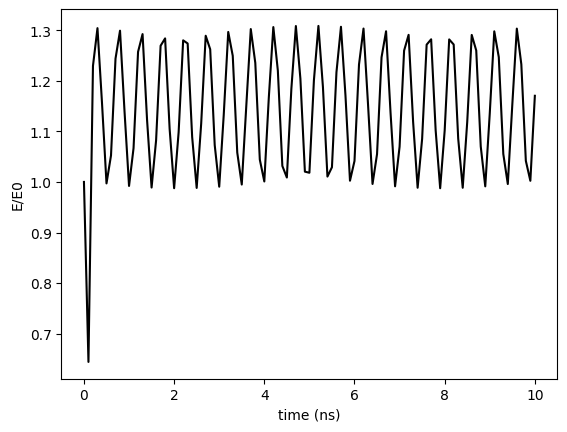

In [ ]:
# Input: initial conditions
x0 = float(input("\n Initial position (nm):\n>"))
v0 = float(input("\n Initial velocity (m/s):\n>"))

# Simulation parameters
dt = float(input("\n Time step dt (ns):\n>"))
ntot = int(input("\n Number of time steps:\n>"))

# Mass
m = 1.0
# Period (ns)
T = 1.0
# Angular frequency
w=2.0*np.pi/T
# Spring constant
k=m*w*w
# Initial energy
E0=(m/2.0)*v0**2+(k/2)*x0**2

# Empty arrays for position, velocity and time
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
t = np.zeros(ntot+1)

# Initial conditions
t[0] = 0.0
x[0] = x0
v[0] = v0

# First step
a=-k*x[0]/m
v_hk=v[0]+(dt/2.0)*a
x[1]=x[0]+dt*v_hk
t[1]=t[0]+dt
i=1

# Iterations
while i<ntot:
    # Acceleration at present position, x(t)
  a = -k*x[i]/m
	  # Velocity variation between t-dt/2 and t+dt/2
  v_hk = v_hk+a*dt
    # New position at t+dt
  x[i+1] = x[i]+dt*v_hk
    # Update time
  t[i+1] = t[i]+dt
    # Update velocity
  v[i+1] = v_hk+(dt/2.0)*a
    # Update counter
  i=i+1

# Energy
E=(m/2.0)*v**2+(k/2)*x**2
# Relative energy value, E/E0
RE=E/E0

# Data representation
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')

It can be observed that in fact, energy is conserved. However, at the beggining there is some type of peak (negative).

### C) Comparison between the correction and velocity Verlet.

These two methods are compared in the spring-mass problem.


 Initial position (nm):
>1.0

 Initial velocity (m/s):
>0.0

 Time step dt (ns):
>0.1

 Number of time steps:
>100


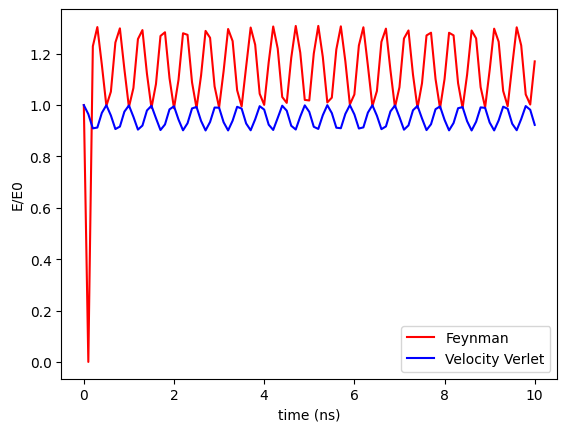

In [ ]:
# Input: initial conditions
x0 = float(input("\n Initial position (nm):\n>"))
v0 = float(input("\n Initial velocity (m/s):\n>"))

# Simulation parameters
dt = float(input("\n Time step dt (ns):\n>"))
ntot = int(input("\n Number of time steps:\n>"))

# Mass
m = 1.0
# Period (ns)
T = 1.0
# Angular frequency
w=2.0*np.pi/T
# Spring constant
k=m*w*w
# Initial energy
E0=(m/2.0)*v0**2+(k/2)*x0**2

# FEYNMAN ALGORITHM

# Empty arrays for position, velocity and time
x_F = np.zeros(ntot+1)
v_F = np.zeros(ntot+1)
t = np.zeros(ntot+1)

# Initial conditions
t[0] = 0.0
x_F[0] = x0
v_F[0] = v0

# First step
a=-k*x[0]/m
v_hk=v[0]+(dt/2.0)*a
x[1]=x[0]+dt*v_hk
t[1]=t[0]+dt
i=1

# Iterations
while i<ntot:
    # Acceleration at present position, x(t)
    a = -k*x[i]/m
	  # Velocity variation between t-dt/2 and t+dt/2
    v_hk = v_hk+a*dt
    # New position at t+dt
    x_F[i+1] = x[i]+dt*v_hk
    # Update time
    t[i+1] = t[i]+dt
    # Update velocity
    v_F[i + 1] = v_hk+(dt/2.0)*a
    # Update counter
    i=i+1

# Energy
E_F=(m/2.0)*v_F**2+(k/2)*x_F**2
# Relative energy value, E_F/E0
RE_F=E_F/E0

# VELOCITY VERLET ALGORITHM

# Empty arrays for position, velocity, acceleration and time
t = np.zeros(ntot+1)
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
a = np.zeros(ntot+1)

# Initial conditions
x[0] = x0
v[0] = v0

# Force and acceleration at t=0
f = -k*x[0]
a[0] = f/m

# Iterations

for i in range(1, ntot+1):
    # Update time
    t[i]=t[i-1]+dt
    # New position
    x[i]=x[i-1]+v[i-1]*dt+(1.0/2.0)*a[i-1]*dt*dt
    # Force at new position
    f=-k*x[i]
    # Acceleration
    a[i]=f/m
    # Velocity at new position
    am=(a[i-1]+a[i])/2.0
    v[i]=v[i-1]+am*dt
    # Update time
    t[i]=t[i-1]+dt

# Energy at all steps
E=(m/2.0)*v*v+(k/2)*x*x
# Relative energy value, E/E0
RE=E/E0

plt.plot(t,RE_F,'r',label='Feynman')
plt.plot(t,RE,'b',label='Velocity Verlet')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
plt.legend()
plt.show()

In both cases (Feynman and velocity Verlet) energy is conserved but with some differences.

*   Feynman algorithm yields greater E/E0 values.
*   Velocity Verlet is periodic in the whole range, without the peak that appears when Feynman algorithm is used.



## 2. Schrödinger equation

Schrödinger equation can be solved for monoelectronic systems like the Hydrogen atom. How does the Schrödinger equation look for such a system?

Time independent Schrödinger equation is $\hat H 𝛹=E𝛹$. The Hamiltonian (kinetic + potential energy) has to be known. For Hydrogen ($Z=1$), the main contributions are:

*   Electron kinetic energy.
*   Nucleus kinetic energy.
*   Attractive potential (nucleus - each electron).

### A) SI units

$\hat H=-\frac{\hbar²}{2m_n}\nabla²_n-\frac{\hbar²}{2m_e}\nabla²_e-\frac{e²}{4\pi\varepsilon_0r_{en}}$

### B) Atomic units

$\hat H=-\frac{1}{3672.31}\nabla²_n-\frac{1}{2}\nabla²_e-\frac{1}{r_{en}}$